In [1]:
import config
config.init()
import pandas as pd
import matplotlib.pyplot as plt
from global_values import *
import librosa
import librosa.display
import numpy as np

'2019-12-17 20:57:20,734 - root - INFO - Init!..'


In [11]:
config.data_dir

'/home/yzk/depression/data/'

In [2]:
dir1 = config.data_dir + 'avec/301_P/' + '301_COVAREP.csv' 
dir_wav = config.data_dir + 'avec/301_P/' + '301_AUDIO.wav' 
from common.sql_handler import SqlHandler
sql = SqlHandler()
sql.get_df(config.tbl_training_set).head()

'2019-12-17 20:57:31,890 - root - INFO - Init!..'


,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,303,0,0,0,0,0,0.0,0,0,0,0,0
1,304,0,6,0,0,1,1.0,2,2,0,0,0
2,305,0,7,1,0,1,1.0,2,2,1,0,0
3,310,0,4,1,1,1,0.0,0,0,1,1,0
4,312,0,2,1,0,0,1.0,1,0,0,0,0


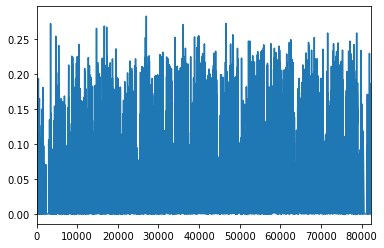

In [60]:
naq = covarep.iloc[:, 2]
naq.plot()
plt.show()

In [7]:
covarep['VUV'].value_counts()

0    50019
1    32370
Name: VUV, dtype: int64

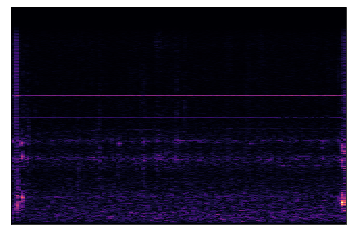

In [33]:
y ,sr = librosa.load(dir_wav, sr=100)
y = librosa.stft(y)
librosa.display.specshow(np.abs(y), )

In [30]:
y = librosa.stft(y)


array([[ 0.01666762+0.0000000e+00j],
       [-0.01034612-5.2041704e-18j],
       [-0.01205116-8.6736174e-18j],
       ...,
       [ 0.00036516+0.0000000e+00j],
       [ 0.00014008+6.0715322e-18j],
       [-0.00015016+0.0000000e+00j]], dtype=complex64)

In [39]:
import scipy.stats
le = np.arange(10)
l = []
l.append(np.max(le))
l.append(scipy.stats.skew(le))
l.append(1)

In [41]:
config.data_dir

'/home/yzk/depression/data/'

In [64]:
df = pd.read_csv(dir1, header=None)
df.columns = COVAREP_COLUMN
df = df[df['VUV'] == 1]
df.head()

,F0,VUV,NAQ,QOQ,H1,H2,PSP,MDQ,peakSlope,Rd,...,HMPDD_3,HMPDD_4,HMPDD_5,HMPDD_6,HMPDD_7,HMPDD_8,HMPDD_9,HMPDD_10,HMPDD_11,HMPDD_12
50,200.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,-0.31890,1.5723,0.46766,...,-0.79039,-0.68040,-0.61413,-0.49586,-0.36915,-0.31233,-0.30176,-0.17140,-0.12405,-0.13627
51,200.0,1,0.114330,0.455160,-2.174200,0.049709,0.118370,-0.32124,1.4779,0.43625,...,-0.91958,-0.78791,-0.70578,-0.57690,-0.44290,-0.35786,-0.32808,-0.18632,-0.11366,-0.10331
52,200.5,1,0.088372,0.133480,-5.163900,0.099529,0.056446,-0.30944,1.6750,0.52762,...,-1.02340,-0.87818,-0.78177,-0.65025,-0.51431,-0.41177,-0.36124,-0.22282,-0.12176,-0.08700
145,128.5,1,0.001166,0.001761,-0.068148,0.001313,0.068541,-0.32492,1.0321,0.48602,...,-0.71707,-0.69879,-0.57788,-0.51546,-0.44628,-0.45114,-0.37188,-0.39000,-0.32521,-0.32697
146,129.0,1,0.000229,0.000345,-0.013356,0.000257,0.068671,-0.33775,1.2849,0.45367,...,-0.87130,-0.82415,-0.68380,-0.60642,-0.51061,-0.49611,-0.40436,-0.39480,-0.30570,-0.28806


In [65]:
from common.stats_features import StatsFea
sf = StatsFea()

In [67]:
df.values.shape

(32370, 74)

In [72]:
data = df['PSP'].values

In [74]:
np.max(data)

0.31525

In [78]:
dir2 =  config.data_dir + 'avec/301_P/' + '301_FORMANT.csv' 
df2 = pd.read_csv(dir2, header=None); df2.columns = FORMANT_COLUMNS

NameError: name 'FORMANT_COLUMNS' is not defined

In [23]:
from concurrent.futures import ThreadPoolExecutor, as_completed
le = [0,1,2]
func = lambda x: 1 / x
with ThreadPoolExecutor() as excutor:
    r = [excutor.submit(func, i) for i in le]
    for f in as_completed(r):
        try:
            print(f.result())
        except Exception as e:
            print(e)

0.5
1.0
division by zero


In [25]:
from common.sql_handler import SqlHandler
sql_handler = SqlHandler()
a_fea = sql_handler.get_df(config.tbl_exp2_audio_fea)
a_fea.head()

,ID,F0_mean,F0_std,F0_skew,F0_kurtosis,F0_peak-rms,F0_iqr,F0_spectral,NAQ_mean,NAQ_std,...,formant_3_peak-rms,formant_3_iqr,formant_3_spectral,formant_4_mean,formant_4_std,formant_4_skew,formant_4_kurtosis,formant_4_peak-rms,formant_4_iqr,formant_4_spectral
0,360,219.121967,39.705247,1.524200,3.370649,1.881537,40.000,0.985468,0.139050,0.058198,...,1.344307,544.600,0.991911,4371.674991,351.333177,-1.025747,1.998865,1.127510,465.8,0.996529
1,489,118.731693,35.924556,1.002931,-0.469495,1.644531,50.000,0.960396,0.056185,0.030640,...,1.364792,568.100,0.000000,4354.096271,352.812082,-0.852072,1.594699,1.132002,506.9,0.000000
2,313,115.341251,32.022233,1.551301,1.357080,1.754329,23.000,0.968640,0.088773,0.039013,...,1.339317,576.100,0.000000,4363.524138,539.744863,-4.688010,34.208579,1.124687,513.5,0.000000
3,415,200.741191,49.280542,1.022406,1.153228,1.838398,54.375,0.972232,0.088937,0.059723,...,1.350535,589.900,0.991219,4350.824437,367.475655,-0.921990,1.414787,1.132534,498.4,0.996183
4,324,102.931117,29.001673,1.727659,2.138336,1.814121,21.000,0.968444,0.119111,0.056257,...,1.381215,577.675,0.000000,4288.578826,503.961816,-3.779061,28.250928,1.145183,550.4,0.000000


In [26]:
train = sql_handler.get_df(config.tbl_training_set)
train.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,303,0,0,0,0,0,0.0,0,0,0,0,0
1,304,0,6,0,0,1,1.0,2,2,0,0,0
2,305,0,7,1,0,1,1.0,2,2,1,0,0
3,310,0,4,1,1,1,0.0,0,0,1,1,0
4,312,0,2,1,0,0,1.0,1,0,0,0,0


In [70]:
a_fea['ID'] = a_fea['ID'].apply(pd.to_numeric)
X = pd.merge(train, a_fea, left_on='Participant_ID', right_on='ID')

In [68]:
train['PHQ8_Score'].values.shape, X.shape

((107,), (106, 547))

In [74]:
X.values.shape

(106, 559)

In [78]:
x = X['PHQ8_Binary'].values
y = X['PHQ8_Score'].values
x.shape, y.shape

((106,), (106,))

In [83]:
np.corrcoef(x, y)[0, 1]

0.8195377206676475

In [86]:
from common.metric import ccc_sore
ccc_sore(x, y)

array([[0.0721071 , 0.05909449],
       [0.05909449, 0.0721071 ]])

In [87]:
(1-2)**2

1

In [88]:
dir_v = config.data_dir + 'avec/301_P/' + '301_CLNF_features.txt' 
df_v = pd.read_csv(dir_v, header=0)

In [91]:
df_v.head()

,frame,timestamp,confidence,success,x0,x1,x2,x3,x4,x5,...,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
0,1,0.000000,0.992054,1,526.786,529.036,534.847,543.439,556.099,575.026,...,560.342,557.519,545.441,539.854,539.214,536.823,537.759,541.713,544.238,544.437
1,2,0.033333,0.991762,1,526.824,529.253,535.202,544.043,557.013,576.148,...,560.335,557.559,545.491,539.973,539.308,536.868,537.670,541.568,544.172,544.411
2,3,0.066667,0.991636,1,526.808,529.343,535.380,544.353,557.477,576.711,...,560.397,557.607,545.494,539.960,539.285,536.835,537.639,541.614,544.238,544.491
3,4,0.100000,0.991989,1,525.793,528.653,534.997,544.260,557.755,577.378,...,558.178,555.652,543.882,537.941,537.135,534.618,535.469,539.250,541.944,542.343
4,5,0.133333,0.992227,1,525.089,528.040,534.418,543.754,557.452,577.392,...,557.289,554.896,543.501,537.439,536.548,533.917,534.515,538.291,541.093,541.583


In [94]:
dir_pose = config.data_dir + 'avec/301_P/' + '301_CLNF_pose.txt'
df_p = pd.read_csv(dir_pose, header=0)
df_p.head()

,frame,timestamp,confidence,success,Tx,Ty,Tz,Rx,Ry,Rz
0,1,0.000000,0.992054,1,1.44225,8.25678,663.887,0.152862,-0.021086,-0.123475
1,2,0.033333,0.991762,1,1.53571,8.16685,664.325,0.161258,-0.016155,-0.132484
2,3,0.066667,0.991636,1,1.57809,8.13997,664.429,0.164528,-0.013700,-0.136451
3,4,0.100000,0.991989,1,1.76802,7.06334,666.207,0.150502,-0.028384,-0.143667
4,5,0.133333,0.992227,1,1.65268,6.75033,667.385,0.143607,-0.039160,-0.149124


In [102]:
col = df_p.columns.values

In [108]:
col = [i.strip() for i in col]
df_p.columns = col

In [109]:
df_p['Tx']

0         1.44225
1         1.53571
2         1.57809
3         1.76802
4         1.65268
5         1.53393
6         1.72210
7         2.15956
8         2.78208
9         2.77754
10        3.54656
11        4.51015
12        5.74659
13        6.54824
14        7.31743
15        7.71174
16        7.89963
17        7.83179
18        7.57169
19        7.19823
20        7.03148
21        7.00220
22        6.50842
23        6.66631
24        6.78051
25        7.22449
26        7.54188
27        7.78061
28        7.96772
29        8.21067
           ...   
24691    49.68730
24692    49.68730
24693    49.68730
24694    49.68730
24695    49.68730
24696    49.68730
24697    49.68730
24698    49.68730
24699    49.68730
24700    49.68730
24701    49.68730
24702    49.68730
24703    49.68730
24704    49.68730
24705    49.68730
24706    49.68730
24707    49.68730
24708    49.68730
24709    49.68730
24710    49.68730
24711    49.68730
24712    49.68730
24713    49.68730
24714    49.68730
24715    4

In [111]:
import time
def func(i):
    time.sleep(1)
    print(i+1)
    
with ThreadPoolExecutor() as e:
    t = [e.submit(func, i) for i in range(10)]
for i in as_completed(t):
    pass
else:
    print('task over')

1
5
2
3
10
9
8
4
6
7
task over


In [114]:
df_v.columns = [item.strip()  for item in df_v.columns.values]

In [117]:
frame1 = df_v.loc[:, 'x0':'x67'].values
frame2 = df_v.loc[:, 'y0':'y67'].values

array([[526.786, 529.036, 534.847, ..., 660.851, 649.658, 639.004],
       [526.824, 529.253, 535.202, ..., 660.907, 649.708, 639.059],
       [526.808, 529.343, 535.38 , ..., 660.92 , 649.732, 639.09 ],
       ...,
       [599.432, 594.082, 589.804, ..., 898.831, 880.692, 867.552],
       [599.432, 594.082, 589.804, ..., 898.831, 880.692, 867.552],
       [599.432, 594.082, 589.804, ..., 898.831, 880.692, 867.552]])

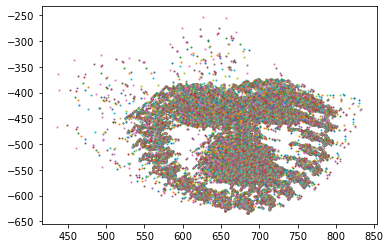

In [122]:
import matplotlib.pyplot as plt
for i in range(1000):
    x = frame1[i,:]
    y = frame2[i,:]
    plt.scatter(x, -y, s=1)

In [128]:
df_v[['x45', 'y45']].values, df_v[['x44', 'y44']].values

(array([[698.284, 425.804],
        [698.159, 425.697],
        [698.136, 425.679],
        ...,
        [932.835, 290.925],
        [932.835, 290.925],
        [932.835, 290.925]]), array([[687.356, 420.846],
        [687.299, 420.817],
        [687.29 , 420.812],
        ...,
        [915.513, 285.186],
        [915.513, 285.186],
        [915.513, 285.186]]))

In [129]:
df_v[['x45', 'y45']].values + df_v[['x44', 'y44']].values

array([[1385.64 ,  846.65 ],
       [1385.458,  846.514],
       [1385.426,  846.491],
       ...,
       [1848.348,  576.111],
       [1848.348,  576.111],
       [1848.348,  576.111]])

In [7]:
fea_p = sql.get_df(config.tbl_exp1_head_fea)

In [8]:
fea_p.head()

,ID,Tx_mean,Tx_std,Tx_skew,Tx_kurtosis,Tx_peak-rms,Tx_iqr,Tx_spectral,Ty_mean,Ty_std,...,Ry_peak-rms,Ry_iqr,Ry_spectral,Rz_mean,Rz_std,Rz_skew,Rz_kurtosis,Rz_peak-rms,Rz_iqr,Rz_spectral
0,358,22.423508,22.092508,-0.343386,4.696411,5.998962,25.579450,NaN,32.174188,83.521037,...,6.632143,0.098364,NaN,0.014717,0.179833,-0.598481,41.832966,17.342216,0.083962,NaN
1,461,-13025.467259,459264.613849,-34.984532,1221.917480,0.000492,13.154825,NaN,-9852.338782,344446.797157,...,6.115079,0.059071,NaN,-0.054559,0.127554,2.242564,24.485468,11.770302,0.146659,NaN
2,419,45.617502,14.088603,5.953346,51.011655,4.779118,8.650600,NaN,-0.227098,12.339794,...,6.201999,0.066276,NaN,-0.194189,0.138767,8.104063,84.246409,12.295890,0.055050,NaN
3,335,100.401690,22.934359,0.633623,6.344467,3.692904,27.614175,NaN,-4.601270,18.522047,...,6.049729,0.076055,NaN,0.078190,0.120904,-1.893180,66.025098,11.529640,0.120784,NaN
4,440,45.712209,14.566380,1.466877,12.968021,3.790906,14.393225,NaN,-22.997851,22.453979,...,6.738364,0.076243,NaN,-0.049216,0.152642,-0.695415,0.618540,4.169697,0.174129,NaN


In [9]:
fea_face = sql.get_df(config.tbl_exp1_face_fea)
fea_face.head()

,ID,right_eye_h_mean,right_eye_h_std,right_eye_h_skew,right_eye_h_kurtosis,right_eye_h_peak-rms,right_eye_h_iqr,right_eye_h_spectral,left_eye_h_mean,left_eye_h_std,...,eyebrow_h_peak-rms,eyebrow_h_iqr,eyebrow_h_spectral,eyebrow_v_mean,eyebrow_v_std,eyebrow_v_skew,eyebrow_v_kurtosis,eyebrow_v_peak-rms,eyebrow_v_iqr,eyebrow_v_spectral
0,301,36.462729,4.796508,11.851789,164.477385,3.527735,1.08100,0.995102,34.516277,3.095202,...,3.065994,1.451500,NaN,89.472188,11.930819,16.959101,360.337784,5.920313,2.496500,0.995857
1,445,49.962299,4.422020,-5.361990,53.780696,1.613793,1.53050,NaN,47.354932,4.369610,...,1.634925,2.351375,0.0,119.145252,8.998837,-6.701933,94.379849,1.719979,3.843875,0.000000
2,427,47.775277,4.250256,-2.813634,52.492788,2.536550,3.47775,NaN,47.387679,3.978325,...,2.825764,5.625750,NaN,117.727520,9.067944,-2.686820,110.866601,2.826369,4.683250,NaN
3,406,41.353419,4.500537,7.322187,169.886264,4.380950,1.94925,0.994286,40.348979,3.972369,...,4.481503,2.375000,NaN,99.609395,14.227511,-3.047559,65.503389,2.973882,6.564625,NaN
4,433,41.711129,4.054732,9.163072,402.148943,5.627599,1.39100,0.000000,38.965184,3.336966,...,3.027654,1.777000,0.0,98.924813,10.618429,7.339640,233.647859,4.102956,5.000750,0.000000
